<a href="https://colab.research.google.com/github/mcnica89/DATA6100/blob/main/NeuralNetworks/MNIST_example_with_blanks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import jax.numpy as jnp
import jax
import time
from tqdm import tqdm

# What is this?

This notebook is based on the JAX training for MNIST and builds up a simple fully connected neural network (aka Multi-Layer-Perceptron MLP) starting from ordinary linear regression, and then logistic regression to build up the intuition for how it works.

#Load MNIST Dataset

In [2]:
import numpy as np
from torch.utils import data
from torchvision.datasets import MNIST

def numpy_collate(batch):
  if isinstance(batch[0], np.ndarray):
    return np.stack(batch)
  elif isinstance(batch[0], (tuple,list)):
    transposed = zip(*batch)
    return [numpy_collate(samples) for samples in transposed]
  else:
    return np.array(batch)

class NumpyLoader(data.DataLoader):
  def __init__(self, dataset, batch_size=1,
                shuffle=False, sampler=None,
                batch_sampler=None, num_workers=0,
                pin_memory=False, drop_last=False,
                timeout=0, worker_init_fn=None):
    super(self.__class__, self).__init__(dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        sampler=sampler,
        batch_sampler=batch_sampler,
        num_workers=num_workers,
        collate_fn=numpy_collate,
        pin_memory=pin_memory,
        drop_last=drop_last,
        timeout=timeout,
        worker_init_fn=worker_init_fn)

class FlattenAndCast(object):
  def __call__(self, pic):
    return np.ravel(np.array(pic, dtype=jnp.float32))

In [3]:
# Define our dataset, using torch datasets
mnist_dataset = MNIST('/tmp/mnist/', download=True, transform=FlattenAndCast())

batch_size = 128
training_generator = NumpyLoader(mnist_dataset, batch_size=batch_size, num_workers=0)

100%|██████████| 9.91M/9.91M [00:00<00:00, 15.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 485kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.47MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.43MB/s]


## Train and test sets

In [4]:
# Get the full train dataset (for checking accuracy while training)
train_images = np.array(mnist_dataset.train_data).reshape(len(mnist_dataset.train_data), -1)
train_labels = np.array(mnist_dataset.train_labels)

N_train = 10000
train_images = train_images[0:N_train,:] #get a subset of the data
train_labels = train_labels[0:N_train]


# Get full test dataset
mnist_dataset_test = MNIST('/tmp/mnist/', download=True, train=False)
test_images = jnp.array(mnist_dataset_test.test_data.numpy().reshape(len(mnist_dataset_test.test_data), -1), dtype=jnp.float32)
test_labels = np.array(mnist_dataset_test.test_labels)


N_test = 10000
test_images = test_images[0:N_test,:] #get a subset of the data
test_labels = test_labels[0:N_test]

/usr/local/lib/python3.12/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.12/dist-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.12/dist-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.12/dist-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


## Plotting examples of MNIST dataset

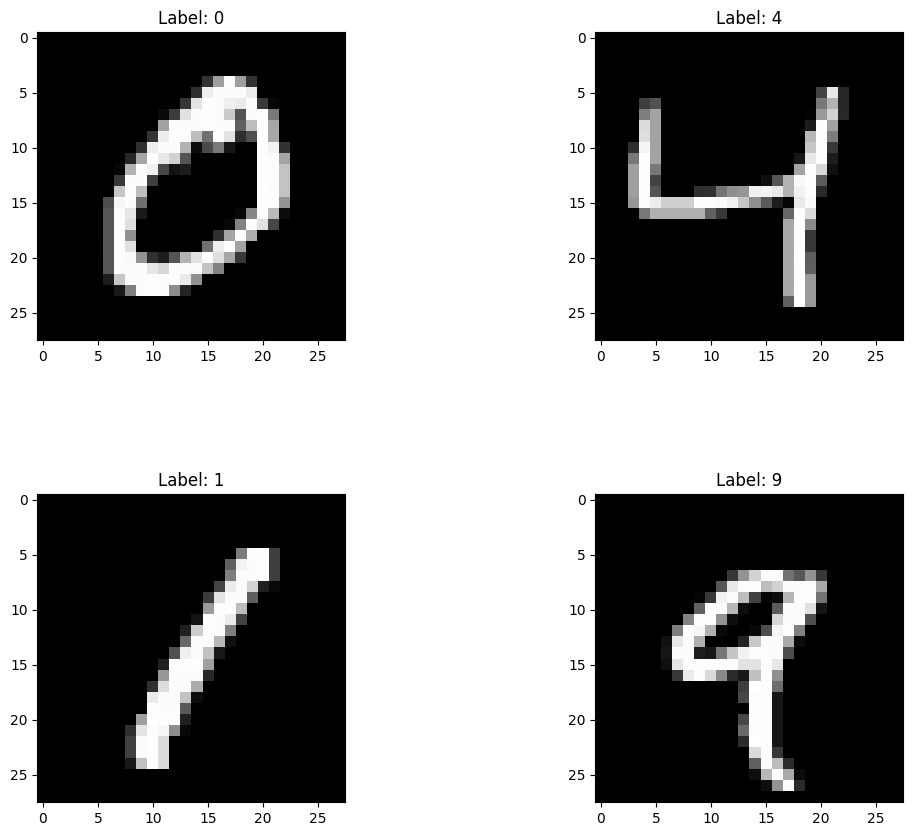

In [5]:
import matplotlib.pyplot as plt

def plot_MNIST_train_examples(my_labels,n_grid = 2):
  figure = plt.figure(figsize=(12, 10))

  #plotting images from the training set
  for i in range(1, n_grid**2 + 1):
    plt.subplot(n_grid, n_grid, i)
    plt.subplots_adjust(hspace =.5, wspace=.5)
    plt.title(f"Label: {my_labels[i]}")

    img = train_images[i].reshape((28,28))
    plt.imshow(img, cmap='gray')

plot_MNIST_train_examples(train_labels)

# Linear Regression (LinR)

We think of linear regression as a [784 by 1] graph.

## Generate random starting paramaters

In [6]:
# A helper function to randomly initialize weights and biases
# for a dense neural network layer
def random_layer_params(m, n, key, scale):
  w_key, b_key = jax.random.split(key)
  return scale * jax.random.normal(w_key, (n, m)), scale * jax.random.normal(b_key, (n,))

# Initialize all layers for a fully-connected neural network with sizes "sizes"
def init_network_params(sizes, key, scale=1e-2):
  keys = jax.random.split(key, len(sizes))
  return [random_layer_params(m, n, k, scale) for m, n, k in zip(sizes[:-1], sizes[1:], keys)]

key = jax.random.PRNGKey(int(time.time()))

In [7]:
layer_sizes = [784, 1]
params = init_network_params(layer_sizes, key)

## Create our function and our loss function

In [8]:
layer_sizes = [784, 1]
params = init_network_params(layer_sizes, key)

def LinR(params, image):
  x = image
  # first layer is feedforward
  w, b = params[0]

  ##### FILL IN THE OUTPUT #####
  LinR_Output = None ###????
  ##############################
  return LinR_Output

print("Lin Reg on 1st training example:")
print(LinR(params,train_images[0]))

Lin Reg on 1st training example:
None


In [9]:

#### FILL IN#####
#### Make a version of LinR that runs on multple inputs at once ###
#### Hint: Use the magic of JAX!
batched_LinR = None ###???
################

print("Lin Reg on all training example:")
print(batched_LinR(params,train_images))

Lin Reg on all training example:


TypeError: 'NoneType' object is not callable

In [ ]:
def MSE_loss_for_LinR(params,images,target):
  preds = batched_LinR(params, images)

  ### FILL IN THE FORMULA FOR THE MSE
  MSE = None ###

  return MSE

print("MSE loss of LinR on training set:")
print(MSE_loss_for_LinR(params,train_images,train_labels))

# Training loop using gradient descent

Here we will repeatedely update the "params" by using gradient descent

In [ ]:
import time

def training_loop(loss_func, acc_func=None, num_epochs = 2, step_size = 0.01):
  global params
  saved_results = []
  for epoch in range(1,num_epochs+1):

      print(f"---Epoch #{epoch}---")
      #Update the weights by gradient descent!
      start_time = time.time()
      for x, y in tqdm(training_generator):
          # This loop will create mini-batches of (x,y) paris to train on
          # The batch size is set as part of the training generator
          # Running through all the examples is called an ''epoch''

          ### FILL IN THE FORMULA FOR THE GRADIENT
          ### Hint: Use JAX magic!!
          grads = None ###

          #FILL IN THE FORMULA FOR THE W and B UPDATES IN TERMS OF THE PARAMS
          params = [( "w update formula" , "b update formula")
                    for (w, b), (dw, db) in zip(params, grads)]

      #### A bunch of bookeeping here to print and record the infrmation ####
      #Print and record stats of this epoch
      if acc_func != None:
        train_acc = acc_func(params, train_images, train_labels)
        test_acc = acc_func(params, test_images, test_labels)

      train_CE_loss = loss_func(params, train_images, train_labels)
      test_CE_loss = loss_func(params, test_images, test_labels)

      results_dict = {'epoch': epoch,
              'train_loss': np.copy(train_CE_loss).item(),
              'test_loss': np.copy(test_CE_loss).item(),
              }

      if acc_func != None:
        results_dict['train_acc'] = np.copy(train_acc).item()
        results_dict['test_acc'] = np.copy(test_acc).item()

      saved_results += [results_dict]

      epoch_time = time.time() - start_time
      print(f"---Time: {epoch_time:0.2f} sec---")
      if acc_func != None:
        print(f"  Train  acc: {train_acc:0.4f}")
        print(f"  Test   acc: {test_acc:0.4f}")
      print(f"  Train loss: {train_CE_loss:0.4f}")
      print(f"  Test  loss: {test_CE_loss:0.4f}")


  return saved_results

In [ ]:
#Train the network!
layer_sizes = [784, 1]
params = init_network_params(layer_sizes, key)
training_loop(MSE_loss_for_LinR,num_epochs=2,step_size = 0.00000001)

In [ ]:
LinR_labels = batched_LinR(params, train_images)
plot_MNIST_train_examples(LinR_labels)

# Non-linear but still regression (NonLinR)

In [ ]:
layer_sizes = [784, 1]
params = init_network_params(layer_sizes, key)

def sigmoid(x):
  #Fill in the sigmoid function to "crunch down" (-\infty, \infty) to (0,9)
  return None


def NonLinR(params, image):
  x = image
  # first layer is feedforward
  w, b = params[0]

  #### FILL IN A VERSION
  output_between_0_and_9 = None
  ####

  return output_between_0_and_9 ###


print("NonLinR on a single example:")
print(NonLinR(params,train_images[0]))

batched_NonLinR = jax.vmap(NonLinR, in_axes=(None, 0))
print("NonLinR on a all examples:")
print(batched_NonLinR(params,train_images))

def MSE_loss_for_NonLinR(params,images,target):
  preds = batched_NonLinR(params, images)
  return jnp.mean( (preds - target)**2 )

print("MSE of train set for NonLin R")
print(MSE_loss_for_NonLinR(params,train_images,train_labels))

In [ ]:
layer_sizes = [784, 1]
params = init_network_params(layer_sizes, key)
training_loop(MSE_loss_for_NonLinR,step_size = 0.000001)

In [ ]:
NonLinR_labels = batched_NonLinR(params, train_images)
plot_MNIST_train_examples(NonLinR_labels)

# Logisitic Regression (LogiR)

In [ ]:
#Initialize Parameters

#Fill in the SIZE of the output layer for logisitic regression
#Hint: How does logistic regression translate between output
# and the class probabilities when there are more than 2 classes?
output_size = None
layer_sizes = [784, output_size]
params = init_network_params(layer_sizes, key)

def sigmoid(x):
  return jnp.exp(x)/(1+jnp.exp(x))

def LogiR_logP(params, image):
  x = image
  # first layer is feedforward
  w, b = params[0]

  ##### Fill in the formula for the logits
  logits = None

  #This just makes it so that the logits are not too big
  # (Big logits can cause numerical issues like nan to appear)
  logits_max_zero = logits - jnp.max(logits)

  #### Fill in the formula to get the log(probability) using the logits
  logP = None

  return logP

print("LogiR on one example:")
print(LogiR_logP(params, train_images[0]))

batched_LogiR_logP = jax.vmap(LogiR_logP, in_axes=(None, 0))

print("LogiR on all examples:")
print(batched_LogiR_logP(params, train_images))



def CE_loss_for_LogiR(params,images,target):
  preds = batched_LogiR_logP(params, images)

  #Instead of a target being from 0 to 9, we need to convert this to a vector
  # Fill in how to do it!
  target_as_vector = None

  #FILL IN THE FORMULA FOR CROSS ENTROPY LOSS
  CE_loss = None

  return CE_loss

print("CE loss of LogiR on all example:")
print(CE_loss_for_LogiR(params,train_images,train_labels))

In [ ]:
layer_sizes = [784, 10]
params = init_network_params(layer_sizes, key)

def top1_acc_LogiR(params, images, target_class):
  #Fill in how to get the prediction from the LogiR function
  predicted_class = None
  return jnp.mean(predicted_class == target_class)

training_loop(CE_loss_for_LogiR,top1_acc_LogiR,num_epochs=2,step_size = 0.01)

In [ ]:
LogiR_labels = batched_LogiR_logP(params, train_images)
plot_MNIST_train_examples(jnp.argmax(LogiR_labels,axis=1))

## Multi-layer perceptron with cross entropy loss (MLP)

In [ ]:
#Lets start by making a MLP (aka "a fully connected nerual network")
# with one hidden layer
# FILL IN what layer_sizes should be here
layer_sizes = None


params = init_network_params(layer_sizes, key)

# rectified linear unit activation function
def relu(x):
  #We will use the rele non-liearity for our nerual network
  return None #


def MLP_logP(params, image):
    # per-example predictions
    # Returns the log probability of each class

    x = image
    # first layer is feedforward
    w, b = params[0]

    #Fill in the formula for the first layer
    x = None
    x_transformed = None #Apply a non-linear transformation to x

    for w, b in params[1:-1]: #This loops through all the hidden layers
        # Fill in the formula to be applied at all the hidden layers
        x = None
        x_transformed = None

    final_w, final_b = params[-1]  #This is the last layer
    #Fill in the formula for the logits
    logits = None
    logits_max_zero = logits - jnp.max(logits)

    #Fill in the formula for the log(prob) using the logits
    logP = None

    return logP

print("MLP logP on a single examples")
print(MLP_logP(params, train_images[0]))

In [ ]:
# Let's upgrade it to handle batches using `vmap`

# Make a batched version of the `predict` function
batched_MLP_logP = jax.vmap(MLP_logP, in_axes=(None, 0))

# `batched_predict` has the same call signature as `predict`
print("MLP logP on all examples")
batched_preds = batched_MLP_logP(params, train_images)
print(batched_preds)

# Loss function

In [ ]:
def CE_loss_for_MLP(params, images, target):
  #This is exactly the same as for Logistic Regression!
  preds = batched_MLP_logP(params, images)
  target_one_hot = jax.nn.one_hot(target, 10)
  return -jnp.mean(preds * target_one_hot)

print("CE loss for the the MLP")
print(CE_loss_for_MLP(params, train_images, train_labels))


In [ ]:
layer_sizes = [784, 784, 10]
params = init_network_params(layer_sizes, key)


def top1_acc_MLP(params, images, target_class):
  predicted_class = jnp.argmax(batched_MLP_logP(params, images), axis=1)
  return jnp.mean(predicted_class == target_class)

training_loop(CE_loss_for_MLP, top1_acc_MLP)

In [ ]:
MLP_preds = batched_MLP_logP(params, train_images)
MLP_labels = jnp.argmax(MLP_preds,axis=1)
plot_MNIST_train_examples( MLP_labels)

In [ ]:
def plot_incorrect_MNIST_train_examples(my_labels,n_grid = 2):
  figure = plt.figure(figsize=(12, 12))

  #plotting images from the training set
  image_ix = 0
  for i in range(1, n_grid**2 + 1):
    image_ix += 1
    plt.subplot(n_grid, n_grid, i)
    plt.subplots_adjust(hspace =.5, wspace=.5)
    while train_labels[image_ix] == my_labels[image_ix]: #loop through to find incorrectly labeled examples
      image_ix += 1
    plt.title(f"My Label: {my_labels[image_ix]}, Actual: {train_labels[image_ix]}")
    img = train_images[image_ix].reshape((28,28))
    plt.imshow(img, cmap='gray')

In [ ]:
MLP_preds = batched_MLP_logP(params, train_images)
MLP_labels = jnp.argmax(MLP_preds,axis=1)
plot_incorrect_MNIST_train_examples( MLP_labels,n_grid = 3)